In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
large = 22
med = 16
small = 12
params = {
    "font.sans-serif": "Simhei",
    "axes.titlesize": 22,
    "legend.fontsize": 16,
    "figure.figsize": (10, 8),
    "figure.dpi": 80,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "figure.titlesize": 22,
    "axes.unicode_minus": False
}
plt.rcParams.update(params)

In [2]:
# 铅钡
# spss聚类结果
spss_cluster_label = [[2,10,8,4,6],
                    [3,11],
                    [19,23,14,15,21,1,5,49,40,37,47,48,26,39,42,30,41,45,24,44,25,29],
                    [9,46,38,27,28,34,7,33,36,13,31,35,32,43,22,12,17,20,16,18]]


In [3]:
label = []
for i in spss_cluster_label:
    ls = []
    for j in i:
        ls.append(j-1)
    label.append(ls)

In [4]:
df = pd.read_excel('2.2铅钡.xlsx')
chemi = df.iloc[:,3:]

chemi.insert(chemi.shape[1], '组类', 0)

for i in range(len(label)):
    chemi.iloc[label[i],-1] = i

chemi.head()

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),组类
0,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,2
1,20.14,0.0,0.00,1.48,0.00,1.34,0.00,10.41,28.68,31.23,3.59,0.37,0.0,2.58,0
2,4.61,0.0,0.00,3.19,0.00,1.11,0.00,3.14,32.45,30.62,7.56,0.53,0.0,15.03,1
3,33.59,0.0,0.21,3.51,0.71,2.69,0.00,4.93,25.39,14.61,9.38,0.37,0.0,0.00,0
4,29.64,0.0,0.00,2.93,0.59,3.57,1.33,3.51,42.82,5.35,8.83,0.19,0.0,0.00,2


In [5]:
# 每一组类中的文物编号为
print('不同组类的文物编号如下:\n', [set(df[chemi['组类']==i].文物编号.sort_values().values) for i in range(len(label))])
print('不同组类的文物采样点如下:\n', [set(df[chemi['组类']==i].文物采样点.sort_values().values) for i in range(len(label))])

不同组类的文物编号如下:
 [{8, 11, 20, 24, 26}, {8, 26}, {2, 34, 36, 38, 39, 40, 41, 43, 49, 50, 19, 51, 52, 54, 56, 57, 58, 30}, {23, 25, 28, 29, 31, 32, 33, 35, 37, 42, 44, 45, 46, 47, 48, 49, 50, 53, 55}]
不同组类的文物采样点如下:
 [{'24', '26', '20', '11', '08'}, {'26严重风化点', '08严重风化点'}, {'38', '56', '43部位1', '51部位2', '34', '02', '54严重风化点', '41', '57', '52', '51部位1', '58', '30部位1', '54', '40', '49', '39', '50', '43部位2', '19', '36', '30部位2'}, {'46', '23未风化点', '29未风化点', '31', '48', '42未风化点1', '33', '42未风化点2', '50未风化点', '28未风化点', '53未风化点', '44未风化点', '55', '49未风化点', '37', '47', '25未风化点', '32', '45', '35'}]


In [6]:
df['组类'] = chemi.组类+1
df.to_excel('2.2铅钡聚类结果.xlsx', index=False)

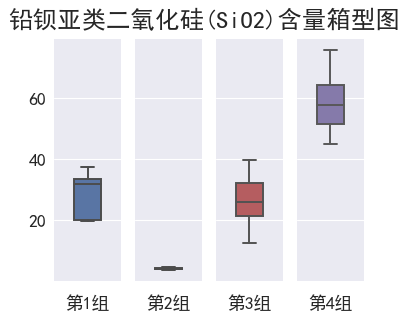

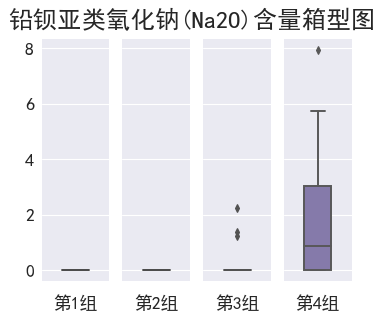

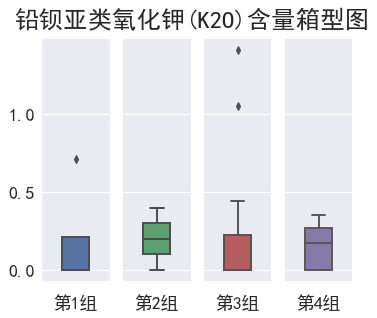

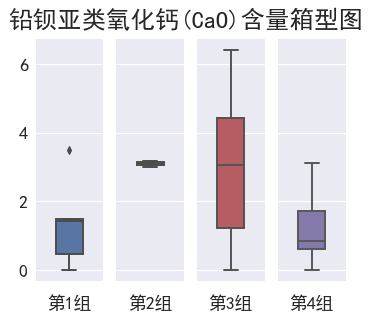

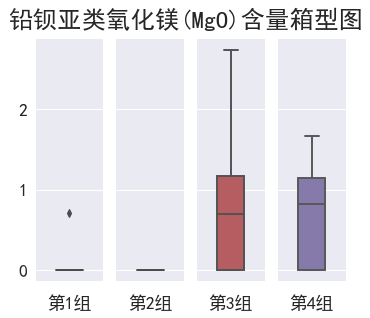

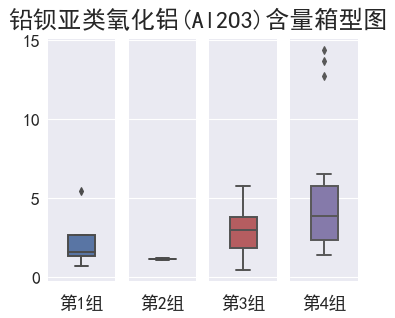

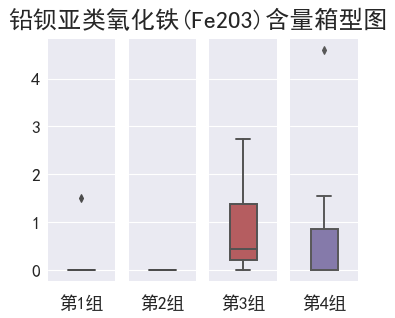

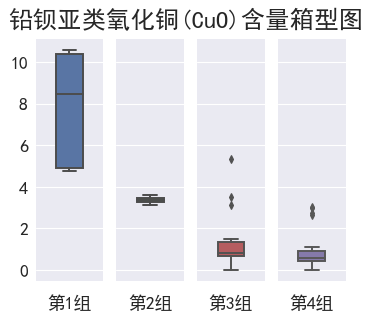

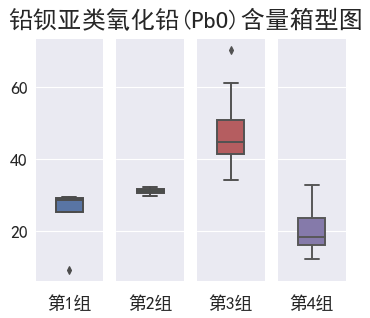

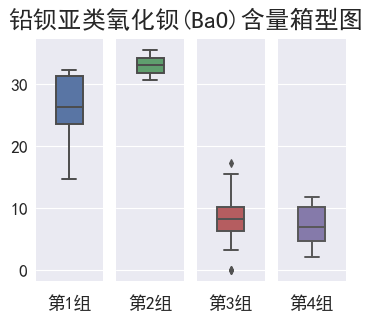

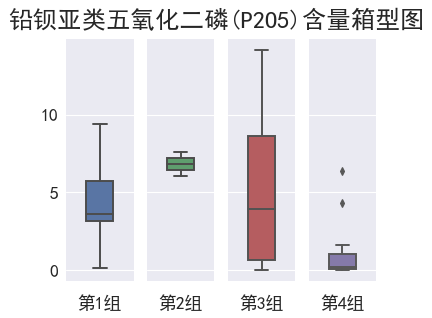

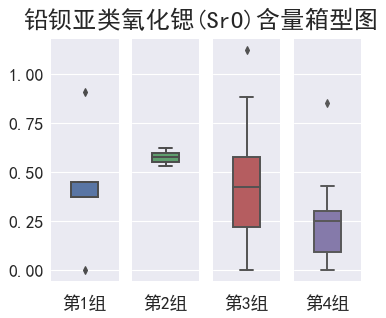

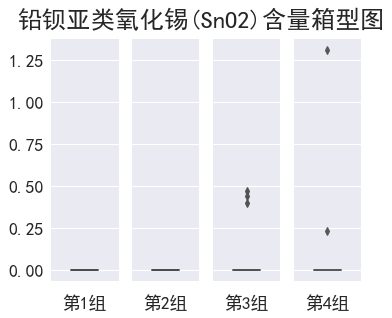

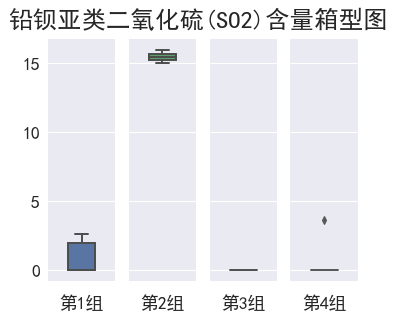

In [7]:
for col_id in range(chemi.shape[1]-1):
    fig, axes = plt.subplots(1,4,figsize=(5,4),sharey='row')
    title = '铅钡亚类'+chemi.columns[col_id]+'含量箱型图'
    fig.suptitle(title)
    for i in range(len(label)):
        ax = axes[i]
        ax.set_xlabel('第%i组'%(i+1))
        sns.boxplot(y=chemi[chemi['组类'] == i].iloc[:,col_id].sort_values().values, color=sns.color_palette(n_colors=4)[i], ax=ax, width=0.4)
    plt.savefig('./系统聚类图/'+title+'.svg', bbox_inches='tight')
    plt.show()

In [8]:
j = 3
for i in range(len(label)):
    print(chemi[chemi['组类'] == i].iloc[:,j])

1    1.48
3    3.51
5    0.00
7    0.47
9    1.44
Name: 氧化钙(CaO), dtype: float64
2     3.19
10    3.01
Name: 氧化钙(CaO), dtype: float64
0     2.34
4     2.93
13    4.49
14    4.24
18    0.78
20    0.37
22    0.68
23    1.11
24    1.87
25    4.96
28    5.24
29    6.40
36    4.58
38    3.19
39    3.58
40    5.13
41    2.27
43    3.19
44    0.00
46    1.21
47    1.31
48    3.49
Name: 氧化钙(CaO), dtype: float64
6     0.50
8     0.63
11    1.34
12    2.98
15    1.60
16    0.46
17    0.64
19    0.38
21    0.89
26    0.79
27    0.00
30    2.14
31    0.84
32    0.00
33    0.87
34    2.82
35    2.08
37    3.12
42    0.78
45    1.13
Name: 氧化钙(CaO), dtype: float64


In [9]:
print(chemi.columns[j])
for i in range(len(label)):
    print(chemi[chemi['组类'] == i].iloc[:,j].min(), chemi[chemi['组类'] == i].iloc[:,j].mean(),
    chemi[chemi['组类'] == i].iloc[:,j].max())

氧化钙(CaO)
0.0 1.3800000000000001 3.51
3.01 3.0999999999999996 3.19
0.0 2.88 6.4
0.0 1.1995 3.12


In [10]:
j = 1
for i in range(len(label)):
    print(chemi[chemi['组类'] == i].iloc[:,j])

1    0.0
3    0.0
5    0.0
7    0.0
9    0.0
Name: 氧化钠(Na2O), dtype: float64
2     0.0
10    0.0
Name: 氧化钠(Na2O), dtype: float64
0     0.00
4     0.00
13    0.00
14    0.00
18    0.00
20    2.22
22    1.38
23    0.00
24    0.00
25    0.00
28    0.00
29    0.00
36    0.00
38    0.00
39    0.00
40    0.00
41    1.22
43    0.00
44    0.00
46    0.00
47    0.00
48    0.00
Name: 氧化钠(Na2O), dtype: float64
6     7.92
8     2.31
11    0.00
12    0.92
15    0.00
16    0.00
17    0.00
19    0.00
21    0.00
26    5.74
27    5.68
30    3.06
31    2.66
32    0.00
33    4.66
34    0.80
35    0.00
37    0.00
42    3.04
45    2.71
Name: 氧化钠(Na2O), dtype: float64
